<p style="align: center;"><img align=center src="https://cdnb.artstation.com/p/assets/covers/images/060/407/559/large/vahid-ghobadi-arfai-vahid-ghobadi-arfai-lo.jpg?1678483232" width=300 height=320/></p>
<h3 style="text-align: center;"><b>Семинар №8 ФЭФМ МФТИ</b></h3>

In [ ]:
from tkinter import *


- Button: кнопка

- Label: текстовая метка

- Entry: однострочное текстовое поле

- Text: многострочное текстовое поле

- Checkbutton: флажок

- Radiobutton: переключатель

- Frame: фрейм, который организует виджеты в группы

- Listbox: список

- Combobox: выпадающий список

- Menu: элемент меню

- Scrollbar: полоса прокрутки

- Treeview: позволяет создавать древовидные и табличные элементы

- Spinbox: список значений со стрелками для перемещения по элементам

- Canvas: фигура с заливкой

- Notebook: панель вкладок

# Самопроверка

Контрольный вопрос №1

Что делает  messagebox ?

Контрольный вопрос №2

В чем отличие bind config?

Контрольный вопрос №3

Напишите программу, выводящую привет

In [ ]:
from tkinter import *

root = Tk() 
root.title("Приложение Привет")  
 
label = Label(text="Hello") 
label.pack()  
 
root.mainloop()

Контрольный вопрос №4

Как реализуется создание класса?
Можно ли создать пустой класс?
Как наследует класс?

Контрольный вопрос №5

In [ ]:
from tkinter import ttk
def calculate(*args):
    try:
        value = float(feet.get()) 
        meters.set(int(0.3048 * value * 10000.0 + 0.5)/10000.0) 
    except ValueError:
        pass
        
root = Tk()
root.title("Feet to Meters")

mainframe = ttk.Frame(root, padding="3 3 12 12")
mainframe.grid(column=0, row=0, sticky=(N, W, E, S))
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
feet = StringVar()
feet_entry = ttk.Entry(mainframe, width=7, textvariable=feet)
feet_entry.grid(column=2, row=1, sticky=(W, E))
meters = StringVar()
ttk.Label(mainframe, textvariable=meters).grid(column=2, row=2, sticky=(W, E))
ttk.Button(mainframe, text="Calculate", command=calculate).grid(column=3, row=3, sticky=W)
ttk.Label(mainframe, text="feet").grid(column=3, row=1, sticky=W)
ttk.Label(mainframe, text="is equivalent to").grid(column=1, row=2, sticky=E)
ttk.Label(mainframe, text="meters").grid(column=3, row=2, sticky=W)

for child in mainframe.winfo_children(): 
    child.grid_configure(padx=5, pady=5)
feet_entry.focus()
root.bind("<Return>", calculate)
root.mainloop()

# Таймер

### datetime модуль

In [ ]:
from datetime import *

dt_now = datetime.now()
print(dt_now)

In [ ]:
current_date = date.today()
print(current_date)

Для получения текущего локального времени сперва нужно получить текущие дату и время, а затем достать из этого объекта только время с помощью метода time():

In [ ]:
current_date_time = datetime.now()
current_time = current_date_time.time()
print(current_time)

Вы можете сами создать объект содержащий время

In [ ]:
timeobj= time(15,30,00)
print(timeobj)

In [ ]:
type(timeobj)

In [ ]:
first_date = date(2024, 10, 25)
second_date = date(2024, 10, 30)
delta = second_date - first_date
print(delta)

timedelta — это длительность, для получения прошлой или будущей даты нужно добавить объект timedelta к существующему или вычесть из него же.

timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

In [ ]:
past_date = datetime.today() - timedelta(days=7)
print(past_date)

### Глобальные и локальные переменные

In [ ]:
def loc():
    y = 10  # локальная переменная y
    print(y)

loc() # выводит 10
print(y)  # выводит ошибка

In [ ]:
z = 10  # глобальная переменная x

def glob():
    print(z)  # выводится 10

glob()  # выводит 10
print(z)  # выводит 10

In [ ]:
a = 10  # глобальная переменная x

def example():
    a = 20  # создает новую локальную переменную x
    print(a)  # выводится 20

example()  # выводит 20
print(a)  # выводит 10

In [ ]:
x = 10  # глобальная переменная x

def example2():
    global x  # указывает, что x является глобальной переменной
    x = 20  # изменяется значение глобальной переменной x
    print(x)  # выводится 20

example2()  # выводит 20
print(x)  # выводит 20

### Сам таймер

Используя новые знания посмотрим как реализовать таймер на питоне.

In [ ]:
import tkinter as Tkinter
from datetime import datetime

counter = 0
running = False

def counter_label(label):
    def count():
        if running:
            global counter
            if counter == 0:
                display = 'Ready!'
            else:
                tt = datetime.utcfromtimestamp(counter) #используем datetime чтобы перевести counter из простого int в часы-минуты-секунды
                string = tt.strftime('%H:%M:%S')
                display = string

            label['text'] = display

            label.after(1000, count) # каждые 1000мс = 1с увеличиваем счетчик на 1, рекурсивно вызывая функцию count c задержкой
            counter += 1

    #включаем count
    count()


# стартуем
def Start(label):
    global running
    running = True
    counter_label(label)
    start['state'] = 'disabled'
    stop['state'] = 'normal'
    reset['state'] = 'normal'


# тормозим
def Stop():
    global running
    start['state'] = 'normal'
    stop['state'] = 'disabled'
    reset['state'] = 'normal'
    running = False


# перезагружаемся
def Reset(label):
    global counter
    counter = 0
    # Если reset нажат после stop. 
    if not running:
        reset['state'] = 'disabled'
        label['text'] = '00:00:00'
    # Если reset нажат во время работы таймера. 
    else:
        label['text'] = '00:00:00'

root = Tkinter.Tk()
root.title("Stopwatch")

# Если окно будет слишком маленьким, будет сложно нажимать на кнопки, так что зададим minsize.
root.minsize(width=250, height=70)

label = Tkinter.Label(root, text='Ready!', fg='black', font='Montserrat 30 bold')
label.pack()
#создадим Frame, на который поместим кнопки
f = Tkinter.Frame(root)

'''
Помните в предыдущем примере мы говорили, что не получится передать в command функцию с круглыми скобками?
Но как быть, если мы хотим передать функцию, которая принимает какой-то аргумент? В нашем примере это Start и Reset
В данном случае мы можем сохранить **вызов** функции с каким-либо аргументом как отдельную функцию, используя ключевое слово lambda
Таким образом, вызова функции не происходит, а saved_start и saved_reset теперь -- объекты-функции, с фиксированным принимаемым аргументом.
'''
saved_start = lambda: Start(label)
saved_reset = lambda: Reset(label)

start = Tkinter.Button(f, text='Start', width=6, command = saved_start)
stop = Tkinter.Button(f, text='Stop', width=6, state='disabled', command = Stop)
reset = Tkinter.Button(f, text='Reset', width=6, state='disabled', command = saved_reset)

# не забываем разместить Frame и кнопки
f.pack(anchor='center', pady=5)
start.pack(side='left')
stop.pack(side='left')
reset.pack(side='left')

root.mainloop()

# Еще примеры виджетов

### Тест

In [ ]:
class Test:
    def __init__(self):
        self.window = Tk()
        self.window.title("Собачник или кошатник?")

        self.question1_label = Label(self.window, text="Кто более милый?")
        self.question1_label.pack()

        self.answer1_var = StringVar()
        #Создаем переменную с помощью StringVar, которая будет хранить выбранный вариант ответа.
        self.answer1_combobox = ttk.Combobox(self.window, textvariable=self.answer1_var)
        #textvariable=self.answer1_var оначает, что выбранный вариант ответа будет храниться в переменной self.answer1_var
        self.answer1_combobox['values'] = ("Собака", "Кошка")
        self.answer1_combobox.pack()

        self.question2_label = Label(self.window, text="Какие качества самые важные для Вашего идеального питомца?")
        self.question2_label.pack()

        self.answer2_var = StringVar()
        self.answer2_combobox = ttk.Combobox(self.window, textvariable=self.answer2_var)
        self.answer2_combobox['values'] = ("Верность и обучаемость", "Самодостаточность и чистоплотность")
        self.answer2_combobox.pack()

        self.result_button = Button(self.window, text="Показать результат", command=self.show_result)
        self.result_button.pack()

    def show_result(self):
        answer1 = self.answer1_var.get()
        #: получим значение, выбранное пользователем в первом вопросе, и сохраним его в переменной 
        answer2 = self.answer2_var.get()

        if ( answer1 == "Собака" and answer2 == "Верность и обучаемость") :
            result = "Вы - Собачник!"
        elif (answer1 == "Кошка" and answer2 == "Самодостаточность и чистоплотность"):
            result = "Вы - Кошатник!"
        else:
            result = "Вы - не определились!"

        self.result_label = Label(self.window, text=result)
        self.result_label.pack()

    def run(self):
        self.window.mainloop()  #начинает ожидать события и обрабатывать их, пока не будет вызвана функция quit() для окна

Test().run()

In [ ]:
from tkinter import ttk
from PIL import Image, ImageTk

class Test:
    def __init__(self):
        self.window = Tk()
        self.window.title("Собачник или кошатник?")

        # Загрузка изображения
        self.image = Image.open("C:\\Users\\Koles\\Downloads\\1.webp")
        self.photo = ImageTk.PhotoImage(self.image)

        # Создание фона с изображением
        self.background_label = Label(self.window, image=self.photo)
        self.background_label.place(x=0, y=0, relwidth=1, relheight=1)

        self.question1_label = Label(self.window, text="Кто более милый?", bg="#f2e8c9")  
        self.question1_label.place(x=100, y=50)

        self.answer1_var = StringVar()
        self.answer1_combobox = ttk.Combobox(self.window, textvariable=self.answer1_var)
        self.answer1_combobox['values'] = ("Собака", "Кошка")
        self.answer1_combobox.place(x=100, y=100)

        self.question2_label = Label(self.window, text="Какие качества самые важные для Вашего идеального питомца?", bg="#f2e8c9")
        self.question2_label.place(x=100, y=150)

        self.answer2_var = StringVar()
        self.answer2_combobox = ttk.Combobox(self.window, textvariable=self.answer2_var)
        self.answer2_combobox['values'] = ("Верность и обучаемость", "Самодостаточность и чистоплотность")
        self.answer2_combobox.place(x=100, y=200)

        self.result_button = Button(self.window, text="Показать результат", command=self.show_result)
        self.result_button.place(x=100, y=250)

    def show_result(self):
        answer1 = self.answer1_var.get()
        answer2 = self.answer2_var.get()

        if (answer1 == "Собака" and answer2 == "Верность и обучаемость"):
            result = "Вы - Собачник!"
        elif (answer1 == "Кошка" and answer2 == "Самодостаточность и чистоплотность"):
            result = "Вы - Кошатник!"
        else:
            result = "Вы - не определились!"

        self.result_label = Label(self.window, text=result, bg="#f2e8c9")
        self.result_label.place(x=100, y=300)

    def run(self):
        self.window.mainloop()

Test().run()

In [ ]:
class Test:
    def __init__(self):
        self.window = Tk()
        self.window.title("Собачник или кошатник?")

        self.question1_label = Label(self.window, text="Кто более милый?")
        self.question1_label.pack()

        self.answer1_var = StringVar()
        self.answer1_combobox = ttk.Combobox(self.window, textvariable=self.answer1_var)
        self.answer1_combobox['values'] = ("Собака", "Кошка")
        self.answer1_combobox.pack()

        self.question2_label = Label(self.window, text="Какие качества самые важные для Вашего идеального питомца?")
        self.question2_label.pack()

        self.answer2_var = StringVar()
        self.answer2_combobox = ttk.Combobox(self.window, textvariable=self.answer2_var)
        self.answer2_combobox['values'] = ("Верность и обучаемость", "Самодостаточность и чистоплотность")
        self.answer2_combobox.pack()

        self.result_button = Button(self.window, text="Показать результат", command=self.show_result)
        self.result_button.pack()

        self.image_label = Label(self.window)
        self.image_label.pack(side=tk.BOTTOM)

    def show_result(self):
        answer1 = self.answer1_var.get()
        answer2 = self.answer2_var.get()

        if ( answer1 == "Собака" and answer2 == "Верность и обучаемость") :
            result = "Вы - Собачник!"
        elif (answer1 == "Кошка" and answer2 == "Самодостаточность и чистоплотность"):
            result = "Вы - Кошатник!"
        else:
            result = "Вы - не определились!"

        self.result_label = Label(self.window, text=result)
        self.result_label.pack()

        # загрузка изображения
        self.image = PhotoImage(file="C:\\Users\\Koles\\Downloads\\2.png")
        self.image_label.config(image=self.image)
        self.image_label.image = self.image

    def run(self):
        self.window.mainloop()

Test().run()

### Флажок

In [ ]:
root = Tk()
root.title("Checkbutton")

var = BooleanVar()
checkbutton = Checkbutton(root, text="Отметьте, если согласны стараться на парах", variable=var)
checkbutton.pack()

def check_state():
    if var.get():
        print("Согласие")
    else:
        print("Отказ")

button = Button(root, text="Отправить решение", command=check_state)
button.pack()

root.mainloop()

### Переключатель

In [ ]:
root = Tk()
root.title("Radiobutton")

# Нам нужна переменная хранящая в себе язык
lang_var = StringVar()
lang_var.set("ru")  # можно установить переменную по умолчанию

greetings = {
    "en": "Hello",
    "zh": "你好",
    "ru": "Привет"
} # словарик

def update_label():
    lang = lang_var.get()
    label.config(text=greetings[lang])

# Переключатель
Radiobutton(root, text="English", variable=lang_var, value="en", command=update_label).pack()
Radiobutton(root, text="Китайский", variable=lang_var, value="zh", command=update_label).pack()
Radiobutton(root, text="Русский", variable=lang_var, value="ru", command=update_label).pack()

# Куда выводится текст
label = Label(root, text=greetings["ru"])
label.pack()

root.mainloop()

### Список со стрелками

In [ ]:
root = Tk()
root.title("Spinbox")

spinbox = Spinbox(root, from_=1, to=10)
spinbox.pack()

def on_select():
    print("Выбрано значение:", spinbox.get())

button = Button(root, text="Выбрать", command=on_select)
button.pack()

root.mainloop()

### Древовидный вид. Таблицы

In [ ]:
from tkinter import ttk

root = Tk()
root.title("Treeview")

tree = ttk.Treeview(root)

tree["columns"] = ("column1", "column2")

tree.column("#0", width=200, minwidth=200, stretch=NO)
tree.column("column1", width=100, minwidth=100, stretch=NO)
tree.column("column2", width=100, minwidth=100, stretch=NO)

tree.heading("#0", text="Категория", anchor=W)
tree.heading("column1", text="Подкатегория", anchor=W)
tree.heading("column2", text="Описание", anchor=W)

tree.insert("", "end", text="Категория 1", values=("Подкатегория 1", "Описание 1"))
tree.insert("", "end", text="Категория 2", values=("Подкатегория 2", "Описание 2"))

tree.pack()

root.mainloop()

# Немного сложнее

### Блокнот

In [ ]:
from tkinter import filedialog, messagebox

class Notepad:
    def __init__(self, root):
        self.root = root
        self.root.title("Блокнот")
        self.root.geometry("800x600")

        self.menu = Menu(self.root)
        self.root.config(menu=self.menu)

        self.file_menu = Menu(self.menu)
        self.menu.add_cascade(label="Файл", menu=self.file_menu)
        self.file_menu.add_command(label="Новый", command=self.new_file)
        self.file_menu.add_command(label="Открыть...", command=self.open_file)
        self.file_menu.add_command(label="Сохранить", command=self.save_file)
        self.file_menu.add_command(label="Сохранить как...", command=self.save_as_file)
        self.file_menu.add_command(label="Закрыть", command=self.root.quit)

        self.text_area = Text(self.root)
        self.text_area.pack(fill=BOTH, expand=1)


    def new_file(self):
        self.text_area.delete(1.0, END)
        self.root.title("Untitled")

    def open_file(self):
        file_path = filedialog.askopenfilename(title="Open File", filetypes=[("Text Files", "*.txt")])
        if file_path:
            with open(file_path, "r") as file:
                self.text_area.delete(1.0, END)
                self.text_area.insert(END, file.read())
                self.root.title(file_path)

    def save_file(self):
        file_path = self.root.title()
        if file_path == "Untitled":
            self.save_as_file()
        else:
            with open(file_path, "w") as file:
                file.write(self.text_area.get(1.0, END))

    def save_as_file(self):
        file_path = filedialog.asksaveasfilename(title="Save As", defaultextension=".txt", filetypes=[("Text Files", "*.txt")])
        if file_path:
            with open(file_path, "w") as file:
                file.write(self.text_area.get(1.0, END))
                self.root.title(file_path)

    def run(self):
        self.root.mainloop()

root = Tk()
Notepad(root).run()

### Крестики нолики

In [ ]:
class TicTacToe:
    def __init__(self):
        self.root = Tk()
        self.root.title("Крестики-Нолики")
        self.frame = Frame(self.root)
        self.frame.pack()

        self.buttons = []
        for i in range(3):
            row = []
            for j in range(3):
                button = Button(self.frame, text="", width=5, height=2, command=lambda i=i, j=j: self.click(i, j))
                button.grid(row=i, column=j)
                row.append(button)
            self.buttons.append(row)

        self.reset_button = Button(self.root, text="Сброс", command=self.reset)
        self.reset_button.pack()

        self.current_player = "X"

    def click(self, i, j):
        if self.buttons[i][j]['text'] == "":
            self.buttons[i][j]['text'] = self.current_player
            if self.check_win():
                self.game_over()
            else:
                self.current_player = "O" if self.current_player == "X" else "X"

    def check_win(self):
        for i in range(3):
            if self.buttons[i][0]['text'] == self.buttons[i][1]['text'] == self.buttons[i][2]['text']!= "":
                return True
            if self.buttons[0][i]['text'] == self.buttons[1][i]['text'] == self.buttons[2][i]['text']!= "":
                return True
        if self.buttons[0][0]['text'] == self.buttons[1][1]['text'] == self.buttons[2][2]['text']!= "":
            return True
        if self.buttons[0][2]['text'] == self.buttons[1][1]['text'] == self.buttons[2][0]['text']!= "":
            return True
        return False

    def game_over(self):
        for row in self.buttons:
            for button in row:
                button['state'] = 'disabled'
        self.reset_button['text'] = "Поздравляем, игрок " + self.current_player + " победил!"

    def reset(self):
        for row in self.buttons:
            for button in row:
                button['text'] = ""
                button['state'] = 'normal'
        self.current_player = "X"
        self.reset_button['text'] = "Сброс"

    def run(self):
        self.root.mainloop()

TicTacToe().run()

# Пример Клима Дмитриевича

### Шарики

In [ ]:
from random import randint

WIDTH = 300
HEIGHT = 200


class Ball:
    def __init__(self):
        self.R = randint(10, 50) #храним размер, при каждом создании объекта будет выбираться случайно
        self.x = randint(self.R, WIDTH - self.R) # храним положение по x и y
        self.y = randint(self.R, HEIGHT - self.R)
        self.dx, self.dy = (10, 10) # это по сути шаг движения шаров. если увеличить -- будут двигаться быстрее
        self.ball_id = canvas.create_oval(self.x - self.R,
                                     self.y - self.R,
                                     self.x + self.R,
                                     self.y + self.R, fill="green") # при создании шарика отрисовываем его

    def move(self):
        self.x += self.dx
        self.y += self.dy
        if self.x + self.R > WIDTH or self.x - self.R <= 0: # отражение от стенок
            self.dx = -self.dx
        if self.y + self.R > HEIGHT or self.y - self.R <= 0: # отр
            self.dy = -self.dy

    def show(self):
        canvas.move(self.ball_id, self.dx, self.dy)


def click_handler(event):
    print('Положение! x=', event.x, 'y=', event.y)

#здесь мы уже привычно обращаемся к balls как к глобальной переменной. На самом деле дело в том, что нам лень писать классы.
def tick():
    for ball in balls:
        ball.move()
        ball.show()
    root.after(50, tick)


root = Tk()
root.geometry(f'{WIDTH}x{HEIGHT}')
canvas = Canvas(root)
canvas.pack()
#сделаем так, чтобы нажатие левой кнопки на поле выводило координаты точки, в которую мы нажали
canvas.bind('<Button-1>', click_handler)
balls = [Ball() for i in range(5)]
# делаем шаг перемещения и отрисовки шаров. поскольку mainloop циклит наше приложение, это будет происходить, пока мы не закроем окно
tick()
root.mainloop()

# 2 Часть

Односвязный список — это линейная и однонаправленная структура данных, в которой данные сохраняются на узлах, и каждый узел связан ссылкой со своим следующим узлом. Каждый узел содержит поле данных и ссылку на следующий узел. Односвязные списки можно перемещать только в одном направлении, тогда как двусвязные списки можно перемещать в обоих направлениях.

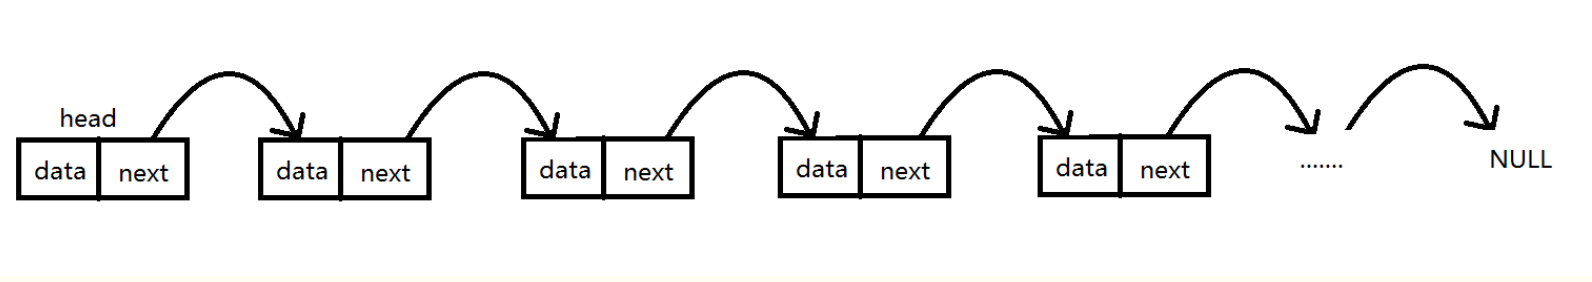

In [ ]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None

'''
Этот класс представляет собой отдельный узел в связанном списке. Узел содержит два атрибута:

data: хранит значение узла (в этом случае целое число).
next: ссылка на следующий узел в списке. Если узел является последним в списке, то next равен None.
'''

class LinkedList:
    def __init__(self):
        self.head = None

    def insert(self, data):
        if not self.head:
            self.head = Node(data)
        else:
            current = self.head
            while current.next:
                current = current.next
            current.next = Node(data)

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" ")
            current = current.next
        print()

'''
Этот класс представляет собой сам связный список. Он содержит методы для добавления новых узлов в список и вывода содержимого списка.

__init__ метод: инициализирует пустой связный список, устанавливая атрибут head в None.

insertметод: добавляет новый узел в конец связного списка. Если список пуст (т. е. head равен None), он создаёт новый узел и устанавливает его в качестве начала списка. Если список не пуст, он проходит по списку до последнего узла и добавляет к нему новый узел.

print_listметод: выводит содержимое связного списка. Он начинает с головы списка и проходит по списку, выводя значение каждого узла, пока не достигнет конца списка (None).
'''

# Пример использования
linked_list = LinkedList()
linked_list.insert(1)
linked_list.insert(2)
linked_list.insert(3)
linked_list.print_list()  # Выведет: 1 2 3

Двусвязный список — это тип связного списка, в котором каждый узел, помимо значения, содержит указатели на предыдущий и следующий элементы. Это позволяет перебирать элементы как в прямом, так и в обратном порядке.

Одним из основных недостатков двусвязного списка является то, что вам нужно больше места в памяти для хранения одной дополнительной ссылки для каждого узла. 

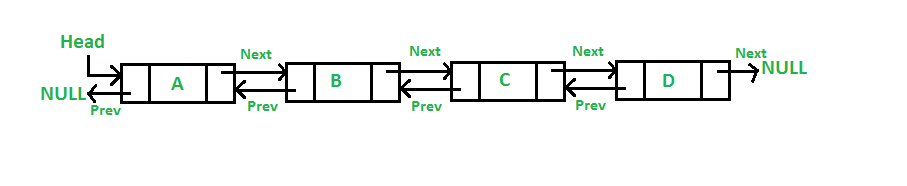

In [ ]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        self.prev = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def insert(self, data):
        if not self.head:
            self.head = Node(data)
            self.tail = self.head
        else:
            new_node = Node(data)
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" ")
            current = current.next
        print()

    def print_reverse(self):
        current = self.tail
        while current:
            print(current.data, end=" ")
            current = current.prev
        print()

# Пример использования
doubly_linked_list = DoublyLinkedList()
doubly_linked_list.insert(1)
doubly_linked_list.insert(2)
doubly_linked_list.insert(3)
doubly_linked_list.print_list() 
doubly_linked_list.print_reverse()  # Выведет: 3 2 1

Стек (англ. stack — стопка; читается стэк) — абстрактный тип данных, представляющий собой список элементов, организованных по принципу LIFO (англ. last in — first out, «последним пришёл — первым вышел»).

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

class Stack:
    def __init__(self):
        self.head = None

    def push(self, value):
        new_node = Node(value)
        new_node.next = self.head
        self.head = new_node

    def pop(self):
        if self.head is None:
            return None
        value = self.head.value
        self.head = self.head.next
        return value

    def delete(self, value):
        if self.head is None:
            return None
        if self.head.value == value:
            self.head = self.head.next
            return value
        current = self.head
        while current.next is not None:
            if current.next.value == value:
                current.next = current.next.next
                return value
            current = current.next
        return None

    def print_stack(self):
        current = self.head
        while current is not None:
            print(current.value, end=" ")
            current = current.next
        print()

stack = Stack()
stack.push(1)
stack.push(2)
stack.push(3)
stack.print_stack()  
stack.pop()  
stack.print_stack() 
stack.delete(1)  
stack.print_stack()  

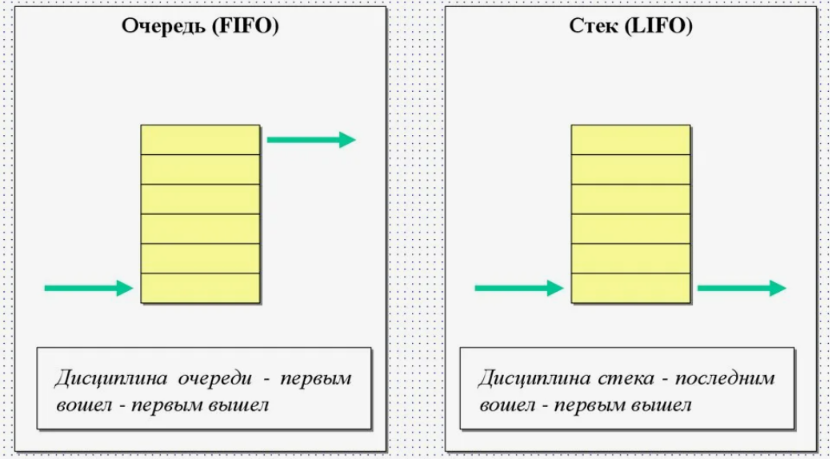

Очередь

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

class Queue:
    def __init__(self):
        self.head = None
        self.tail = None

    def enqueue(self, value):
        new_node = Node(value)
        if self.tail is None:
            self.head = new_node
            self.tail = new_node
        else:
            self.tail.next = new_node
            self.tail = new_node

    def dequeue(self):
        if self.head is None:
            return None
        value = self.head.value
        self.head = self.head.next
        if self.head is None:
            self.tail = None
        return value

    def delete(self, value):
        if self.head is None:
            return None
        if self.head.value == value:
            self.head = self.head.next
            if self.head is None:
                self.tail = None
            return value
        current = self.head
        while current.next is not None:
            if current.next.value == value:
                current.next = current.next.next
                if current.next is None:
                    self.tail = current
                return value
            current = current.next
        return None

    def print_queue(self):
        current = self.head
        while current is not None:
            print(current.value, end=" ")
            current = current.next
        print()
queue = Queue()
queue.enqueue(1)
queue.enqueue(2)
queue.enqueue(3)
queue.print_queue() 
queue.dequeue() 
queue.print_queue() 
queue.delete(3)  
queue.print_queue() 

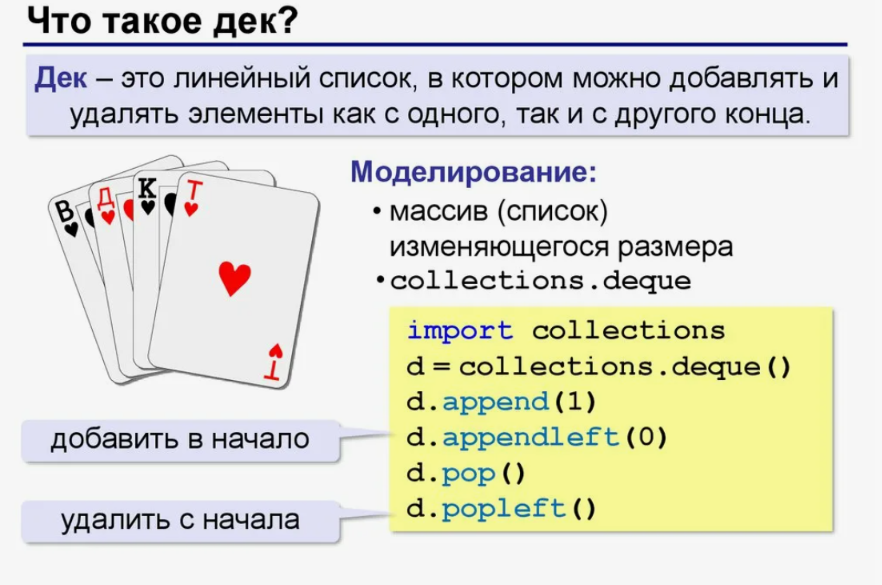

### Декораторы

In [ ]:
'''
Декораторы — это, по сути, "обёртки", которые дают нам возможность изменить поведение функции, не изменяя её код. 

Любая достаточно общая функциональность, которую можно «прикрепить» к поведению существующего класса или функции, является отличным примером использования декораторов. Сюда входит:
обеспечение контроля доступа и аутентификации,
инструментарий и функции управления временем,
ограничение скорости,
кэширование и многое другое.
'''
def null_decorator(func):
    return func
def greet():
    return 'Hello!'

greet = null_decorator(greet)

greet()

In [ ]:
@null_decorator
def greet():
    return 'Hello!'
greet()

In [ ]:
def uppercase(func):
    def wrapper():
        original_result = func()
        modified_result = original_result.upper()
        return modified_result
    return wrapper

@uppercase
def greet():
    return 'Hello!'

greet()

Вложенная функция — это функция, которая определяется внутри другой функции. Вложенная функция имеет доступ к переменным внешней функции и может их использовать. 

In [ ]:
def outer(x):
    def inner(y):
        return x + y
    return inner

add_five = outer(5)
print(add_five(3)) 

Декоратор — это специальная функция, которая принимает другую функцию в качестве аргумента и расширяет её поведение без изменения исходного кода.

Вложенные функции используются для организации кода, а декораторы используются для расширения поведения функций.
Вложенные НЕ меняют поведение внешней функции, декораторы МЕНЯЮТ поведение декорируемой функции.
Вложенные функции ИМЕЮТ доступ к переменным внешней функции,декораторы НЕ имеют доступа к переменным декорируемой функции.